<a href="https://colab.research.google.com/github/shashwatshukla123/class-132/blob/main/C_132_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Solar Systems with Statistics

In today's class, we will plot a few graphs and apply statistics to the data we have! We will also try to find some interesting insights about different solar systems.

\
Before we do that, let us recall the fields that are left in the CSV -

*   ***name*** - name of the planet
*   ***light_years_from_earth*** - Distance of the exo-planet from earth in light years
*   ***planet_mass*** - Mass of the planet
*   ***stellar_magnitude*** - This is the brightness of the host star of the planet when observed from Earth (just as the sun is our host star)
*   ***discovery_date*** - This is the year of discovery for the exo-planet
*   ***planet_type*** - This is the type of the planet (Gas Giant, Super Earth, etc.)
*   ***planet_radius*** - This is the radius of the exo-planet with respect to Earth or Jupiter.
*   ***orbital_radius*** - This is the average distance of this exo-planet from its sun. Just like our solar system has 1 sun, there are multiple solar systems that contain many planets and sun(s)
*   ***orbital_period*** - This is the time it takes to complete one orbit of it’s sun
*   ***eccentricity*** - This denotes how circular the orbit is. It might be oval in shape too. The lower the eccentricity, the more circular is the orbit
*   ***solar_system_name*** - The name of the host solar system
*   ***planet_discovery_method*** - This is the discovery method which was used to find this exo-planet
*   ***planet_orbital_inclination*** - This is the orbital inclination, which means that it is the tilt of the exo-planet’s orbit when it revolves around its sun
*   ***planet_density*** - This is the density of the planet
*   ***right_ascension*** - This is the right ascension of the planetary system, which is the east-west coordinate by which the position of this planet is measured
*   ***declination*** - This is the north-south coordinate by which the position of the planet is measured
*   ***host_temperature*** - This is the temperature of the host star in Kelvin
*   ***host_mass*** - This is the amount of mass contained in the host star
*   ***host_radius*** - This is the radius of the host star

\
Great! Now since we already know that we have 8 planets in our solar system, let's see if we can find out if there are any similar solar systems like us in the universe by seeing how many planets are there in the other solar systems.

\
For this, we have a column known as ***solar_system_name*** in our CSV. Using this, we can create a dictionary to maintain the count of planets each solar system has!

\
Before we write any code for this, let's just upload the CSV to our Colab first!























Now let's just write the code to read the CSV

In [1]:
import csv

rows = []

with open("main.csv", "r") as f:
  csvreader = csv.reader(f)
  for row in csvreader: 
    rows.append(row)

headers = rows[0]
planet_data_rows = rows[1:]
print(headers)
print(planet_data_rows[0])

['', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
['0', '11 Comae Berenices b', '305.0', '19.4 Jupiters', '4.74', '2007', 'Gas Giant', '1.08 x Jupiter', '1.29 AU', '326 days', '0.23', '11 Com', 'Radial Velocity', '', '', '12h20m43.03s', '+17d47m34.3s', '4742.0', '2.7', '19.0']


Here, we can see that there is an extra field added into the CSV, denoting the row count but the first header is an empty string. Let's fix that and then proceed with finding the number of planets in each of the solar system!

In [2]:
headers[0] = "row_num"

solar_system_planet_count = {}
for planet_data in planet_data_rows:
  if solar_system_planet_count.get(planet_data[11]):
    solar_system_planet_count[planet_data[11]] += 1
  else:
    solar_system_planet_count[planet_data[11]] = 1

max_solar_system = max(solar_system_planet_count, key=solar_system_planet_count.get)
print("Solar system {} has maximum planets {} out of all the solar systems we have discovered so far!".format(max_solar_system, solar_system_planet_count[max_solar_system]))

Solar system KOI-351 has maximum planets 8 out of all the solar systems we have discovered so far!


Great! Solar system **HD 10180** has **6** planets! Could this be our next home? Let's create a list of all the planets in this solar system so we can take a deeper look at it!

In [3]:
temp_planet_data_rows = list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  planet_mass = planet_data[3]
  if planet_mass.lower() == "unknown":
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_mass_value = planet_mass.split(" ")[0]
    planet_mass_ref = planet_mass.split(" ")[1]
    if planet_mass_ref == "Jupiters":
      planet_mass_value = float(planet_mass_value) * 317.8
    planet_data[3] = planet_mass_value

  planet_radius = planet_data[7]
  if planet_radius.lower() == "unknown":
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_radius_value = planet_radius.split(" ")[0]
    planet_radius_ref = planet_radius.split(" ")[2]
    if planet_radius_ref == "Jupiter":
      planet_radius_value = float(planet_radius_value) * 11.2
    planet_data[7] = planet_radius_value

print(len(planet_data_rows))

hd_10180_planets = []
for planet_data in planet_data_rows:
  if max_solar_system == planet_data[11]:
    hd_10180_planets.append(planet_data)

print(len(hd_10180_planets))
print(hd_10180_planets)

4251
7
[['3665', 'Kepler-903 b', '2704.0', '4.7', '14.615', '2016', 'Super Earth', '2.01', 'Unknown', '10.4 days', '0.0', 'KOI-351', 'Transit', '89.2', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3824', 'KOI-142 b', '1106.0', '9.5', '13.11', '2013', 'Neptune-like', 3.4383999999999997, 'Unknown', '10.9 days', '0.06', 'KOI-351', 'Transit', '89.4', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3825', 'KOI-142 c', '1106.0', 214.1972, '13.11', '2013', 'Gas Giant', 14.0, '0.15525 AU', '22.3 days', '0.06', 'KOI-351', 'Transit', '89.68', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3826', 'KOI-1599.01', '3813.0', '4.6', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.14728 AU', '20.4 days', '0.01', 'KOI-351', 'Transit', '89.71', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3827', 'KOI-1599.02', '3813.0', '9', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.112293 AU', '13.6 days', '0.01', 'KOI-351', 'Transit'

Great, now let's plot a bar chart on the planet_mass column with these 6 planet data -

In [4]:
import plotly.express as px

hd_10180_planet_masses = []
hd_10180_planet_names = []
for planet_data in hd_10180_planets:
  hd_10180_planet_masses.append(planet_data[3])
  hd_10180_planet_names.append(planet_data[1])

hd_10180_planet_masses.append(1)
hd_10180_planet_names.append("Earth")

fig = px.bar(x=hd_10180_planet_names, y=hd_10180_planet_masses)
fig.show()

Now before we proceed, let's learn a fun fact -

Great Scientist Albert Einstein gave us a formula with which we can calculate the gravity of any planet.
The formula is this -

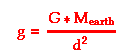

Here, G is a gravitational constant, which means that it will always be the same.

M(earth) is the mass of Earth (or any other planet if we are calculating it for another planet)

d is the radius of the planet!

Here, we can see an inverse relation between the the radius of the planet and the gravity. The more the radius (and bigger the planet), the lesser would be Gravity.

But then, we also see a direct relation between The mass of the planet and the gravity. The more the mass of the planet, the more will be the gravity.

Our **Earth’s gravity is 9.8 m/s**, and we as humans are accustomed to it.

In order for us to exist on any other planet, the gravity should be close to what we have here.

**Mars** has a gravity of **3.711 m/s** and **Moon** has a gravity of **1.62 m/s**.

Given what we have just learnt, let’s try to plot a scatter plot for all the planets, where we will keep the mass of the planet as the Y-Coordinate, The Radius of the Planet as X-Coordinate, and the size of the blob as the gravity of it. Let’s see if we can find anything interesting!

**The Value of G (Gravitational Constant) is *6.674e-11***

**Mass of Earth = 5.972e+24**

**Radius of Earth = 6371000**

Note - Since we have the planet_mass and planet_radius with Reference to Earth, don’t forget to multiple the mass of the earth and the radius of the earth with these values -

In [5]:
temp_planet_data_rows = list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  if planet_data[1].lower() == "hd 100546 b":
    planet_data_rows.remove(planet_data)

planet_masses = []
planet_radiuses = []
planet_names = []
for planet_data in planet_data_rows:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_names.append(planet_data[1])
planet_gravity = []
for index, name in enumerate(planet_names):
  gravity = (float(planet_masses[index])*5.972e+24) / (float(planet_radiuses[index])*float(planet_radiuses[index])*6371000*6371000) * 6.674e-11
  planet_gravity.append(gravity)

fig = px.scatter(x=planet_radiuses, y=planet_masses, size=planet_gravity, hover_data=[planet_names])
fig.show()

**Fun Fact - Our standing human bodies can withstand a gravitational force 90 times stronger than earth!**

Although that is going to be a bit extreme, we can still survive at 10 times the gravity we have at Earth. Let’s list down all the names of the planets that have Gravity of 100 or less!


In [6]:
low_gravity_planets = []
for index, gravity in enumerate(planet_gravity):
  if gravity < 10:
    low_gravity_planets.append(planet_data_rows[index])

print(len(low_gravity_planets))

1012


In [7]:
low_gravity_planets = []
for index, gravity in enumerate(planet_gravity):
  if gravity < 100:
    low_gravity_planets.append(planet_data_rows[index])

print(len(low_gravity_planets))

3951


Let's take a look at our headers again

In [8]:
print(headers)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


Here, we have a header called planet_type. Let's see how many different types of planets are we dealing with -

In [18]:
planet_type_values = []
for planet_data in planet_data_rows:
  planet_type_values.append(planet_data[6])
#print(list(planet_type_values))
print(list(set(planet_type_values)))

['Terrestrial', 'Gas Giant', 'Neptune-like', 'Super Earth']


Now that we have the types of planets that are out there, let’s understand these terms -

**Neptune-like** => These planets are like neptune! They are big in size and have rings around them. They are also made of Ice.

**Super-Earth** => These are the planets that have mass greater than earth but smaller than that of Neptune! (Neptune is 17 times Earth)

**Terrestrial** => It is a planet that is composed primarily of silicate rocks or metals (Like Earth, Mars)

**Gas Giant** => There are the planets that are composed of Gas (Hydrogen and Helium)

Based on this, let’s try to do some clustering to see if there is any relation between planet type and mass of the planet. It looks like there is but let’s see.


In [10]:
planet_masses = []
planet_radiuses = []
for planet_data in low_gravity_planets:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])

fig = px.scatter(x=planet_radiuses, y=planet_masses)
fig.show()

Let's do clustering to find the value of by using k-means algrothim

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



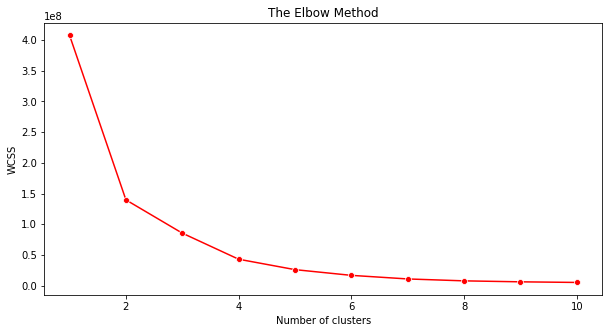

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = []
for index, planet_mass in enumerate(planet_masses):
  temp_list = [
                  planet_radiuses[index],
                  planet_mass
              ]
  X.append(temp_list)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 The graph decent up untill 4 after which it is significant.

In [13]:
planet_masses = []
planet_radiuses = []
planet_types = []
for planet_data in low_gravity_planets:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_types.append(planet_data[6])

fig = px.scatter(x=planet_radiuses, y=planet_masses, color=planet_types)
fig.show()

In [19]:
suitable_planets = []
for planet_data in low_gravity_planets:
  if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
    suitable_planets.append(planet_data)
print(suitable_planets)
print(len(suitable_planets))

[['29', '55 Cancri e', '41.0', '8.08', '5.96', '2004', 'Super Earth', '1.91', '0.01544 AU', '0.7 days', '0.03', '55 Cnc', 'Radial Velocity', '83.3', '6.4', '08h52m35.81s', '+28d19m50.9s', '5196.0', '0.91', '0.94'], ['102', 'CoRoT-7 b', '524.0', '3.1783', '11.668', '2009', 'Super Earth', '1.681', '0.017016 AU', '0.9 days', '0.0', 'CoRoT-7', 'Transit', '80.1', '', '06h43m49.47s', '-01d03m46.9s', '5275.0', '0.82', '0.83'], ['113', 'DMPP-1 d', '202.0', '3.35', '7.981', '2019', 'Super Earth', '1.65', '0.0422 AU', '2.9 days', '< 0.07', 'DMPP-1', 'Radial Velocity', '', '', '05h47m06.27s', '-10d37m48.8s', '6196.0', '1.21', '1.26'], ['114', 'DMPP-1 e', '202.0', '4.13', '7.981', '2019', 'Super Earth', '1.86', '0.0651 AU', '5.5 days', '< 0.07', 'DMPP-1', 'Radial Velocity', '', '', '05h47m06.27s', '-10d37m48.8s', '6196.0', '1.21', '1.26'], ['116', 'DMPP-3 A b', '160.0', '2.58', '9.066', '2019', 'Super Earth', '1.41', '0.0662 AU', '6.7 days', '0.14', 'DMPP-3 A', 'Radial Velocity', '', '', '06h06m29